In [32]:
"Lab3 Homework Group work Individual Component, Author:Jason Yao"

import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
winenam = ["class","Alcohol","Malic acid ", "Ash" , "Alcalinity of ash" 
                ,"Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols" 
                ,"Proanthocyanins", "Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
wine = pd.read_csv('wine.data' ,names=winenam)
wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


# Preliminary data analysis
## missing value

In [5]:
null_data = wine[wine.isnull().any(axis=1)]
display(null_data)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


No missing value here  

## outliers

In [6]:
"""" clean outliers here by compute Z-score of each value in the column, if abs of Z score less than 3 than delete this row"""
data = wine[(np.abs(stats.zscore(wine)) < 3).all(axis=1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 177
Data columns (total 14 columns):
class                           168 non-null int64
Alcohol                         168 non-null float64
Malic acid                      168 non-null float64
Ash                             168 non-null float64
Alcalinity of ash               168 non-null float64
Magnesium                       168 non-null int64
Total phenols                   168 non-null float64
Flavanoids                      168 non-null float64
Nonflavanoid phenols            168 non-null float64
Proanthocyanins                 168 non-null float64
Color intensity                 168 non-null float64
Hue                             168 non-null float64
OD280/OD315 of diluted wines    168 non-null float64
Proline                         168 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.7 KB


only deleted 9 rows so delete the outlier rows directly is a easy way to process ouelier.  

## Correlation

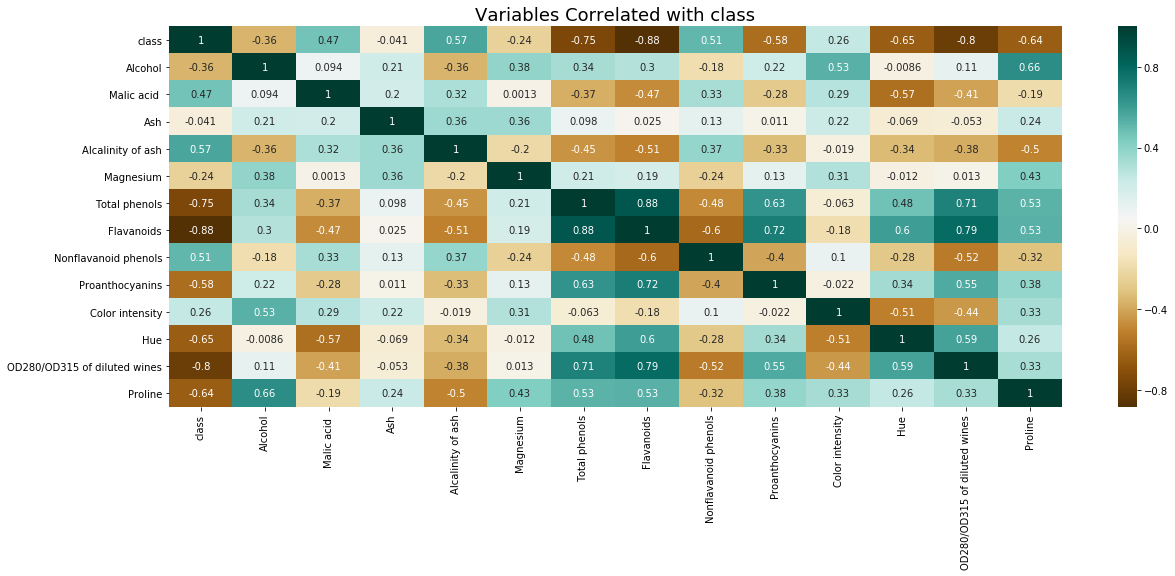

In [7]:
plt.figure(figsize = (20,7))
sns.heatmap(data.corr(), cmap ='BrBG', annot = True)
plt.title('Variables Correlated with class', fontsize = 18)
plt.show()

Flavanoids,OD280/OD315 of diluted wines have highest correlation with class. So this two attributes highly determines the class. While Ash have weakest correlation with class.  



# Data Processing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 177
Data columns (total 14 columns):
class                           168 non-null int64
Alcohol                         168 non-null float64
Malic acid                      168 non-null float64
Ash                             168 non-null float64
Alcalinity of ash               168 non-null float64
Magnesium                       168 non-null int64
Total phenols                   168 non-null float64
Flavanoids                      168 non-null float64
Nonflavanoid phenols            168 non-null float64
Proanthocyanins                 168 non-null float64
Color intensity                 168 non-null float64
Hue                             168 non-null float64
OD280/OD315 of diluted wines    168 non-null float64
Proline                         168 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.7 KB


All the attribute are numerical so that don't need to be transform, outliers and missing values have been processed


# Choose an evaluation approach
use Crossvalidation  
because this method can avoid overfitting and give some insight of how the model generalize to unkonwn data, and give a more accurate estimation of prediction performance. It is the most commonly used method for model validation.

In [9]:
X = np.array(data.iloc[:, 1:13]) 
y = np.array(data['class']) 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=5)
print(X_train.size,y_test.size)
display(X_train, y_train)

1512 42


array([[12.77    ,  2.39    ,  2.28    , ...,  9.899999,  0.57    ,
         1.63    ],
       [12.36    ,  3.83    ,  2.38    , ...,  7.65    ,  0.56    ,
         1.58    ],
       [11.61    ,  1.35    ,  2.7     , ...,  2.65    ,  0.96    ,
         3.26    ],
       ...,
       [13.23    ,  3.3     ,  2.28    , ..., 10.52    ,  0.56    ,
         1.51    ],
       [11.79    ,  2.13    ,  2.78    , ...,  3.      ,  0.97    ,
         2.44    ],
       [12.51    ,  1.73    ,  1.98    , ...,  2.94    ,  1.04    ,
         3.57    ]])

array([3, 3, 2, 1, 2, 1, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 3,
       2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 1,
       2, 1, 3, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2, 2, 1, 2, 3, 2, 2, 2, 3,
       1, 3, 1, 2, 1, 1, 3, 2, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 3, 3, 3, 2,
       1, 2, 1, 1, 2, 2, 3, 1, 3, 2, 3, 1, 2, 3, 2, 2], dtype=int64)

# Individual Exceptional work
## knn
the tunable parameter is the number of neighbors

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: once
  after removing the cwd from sys.path.


good parameter n_neighbors : 3
Accuracy: 0.87 (+/- 0.08)


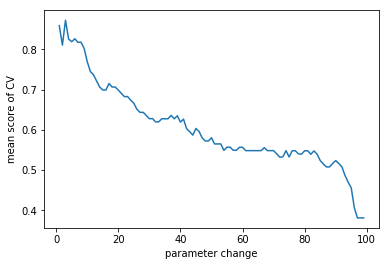

In [30]:
import sklearn.neighbors
"""define: determine hyperpameter, plot the process, according to the method and parameter needs to be changed"""
def process(num,parameter,method):
    warnings.warn("once")
    temp = 0
    all_score = []
    good_parameters = 0
    good_scores = 0
    params = {parameter: num}
    for k, v in params.items():
        for val in v:
            clf = method.set_params(**{k: val})
            method.fit(X_train, y_train)
            scores = cross_val_score(method, X_train, y_train, cv=5, scoring='accuracy')
            all_score.append(scores.mean())
            if scores.mean() > temp:
                temp = scores.mean()
                good_scores = scores
                good_parameters = val
    print("good parameter",parameter,":",good_parameters)
    print("Accuracy: %0.2f (+/- %0.2f)" % (good_scores.mean(), good_scores.std() * 2))
    plt.plot(num, all_score)
    plt.xlabel('parameter change')
    plt.ylabel('mean score of CV')
    plt.show()
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=0, 
                                             weights='uniform', algorithm='auto', leaf_size=30, 
                                             p=2, metric='minkowski')
num = list(range(1,100))
process(num,'n_neighbors', knn)

In [20]:
"""knn prediction"""
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, 
                                             weights='uniform', algorithm='auto', leaf_size=30, 
                                             p=2, metric='minkowski')
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print (score)

0.8333333333333334


knn generalizes quite well compare to the trainning set performance


good parameter metric : manhattan
Accuracy: 0.87 (+/- 0.06)


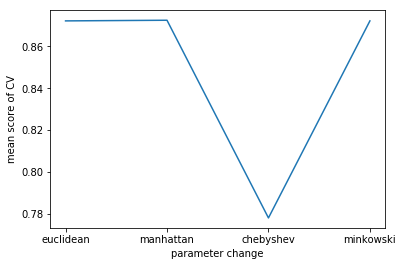

In [63]:
num = ["euclidean","manhattan","chebyshev","minkowski"]
process(num,'metric', knn)




In [64]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, 
                                             weights='uniform', algorithm='auto', leaf_size=30, 
                                            metric='manhattan')
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print (score)

0.8809523809523809


'manhattan' performs better than minkowski distance


